In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sn
import pandas as pd
from matplotlib import gridspec
%matplotlib inline

In [22]:
# define list of devices
devices = ['Mobile', 'Tablet', 'Desktop', 'TV']

# define tables with the results
logreg_results = np.array([[927, 66, 7, 0],
                           [71, 917, 11, 0],
                           [1, 1, 996, 0],
                           [6, 1, 3, 218]])
logreg_results = logreg_results.astype('float') / logreg_results.sum(axis=1)[:, np.newaxis]

neur_results = np.array([[883, 109, 8, 0],
                         [10, 972, 16, 0], 
                         [1, 2, 997, 0],
                         [12, 4, 2, 200]])
neur_results = neur_results.astype('float') / neur_results.sum(axis=1)[:, np.newaxis]

vsm_results = np.array([[827, 125, 48, 1],
                        [38, 701, 258, 0],
                        [59, 0, 940, 0],
                        [41, 1, 16, 171]])
vsm_results = vsm_results.astype('float') / vsm_results.sum(axis=1)[:, np.newaxis]

/home/VICOMTECH/smasneri/.virtualenvs/cv/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


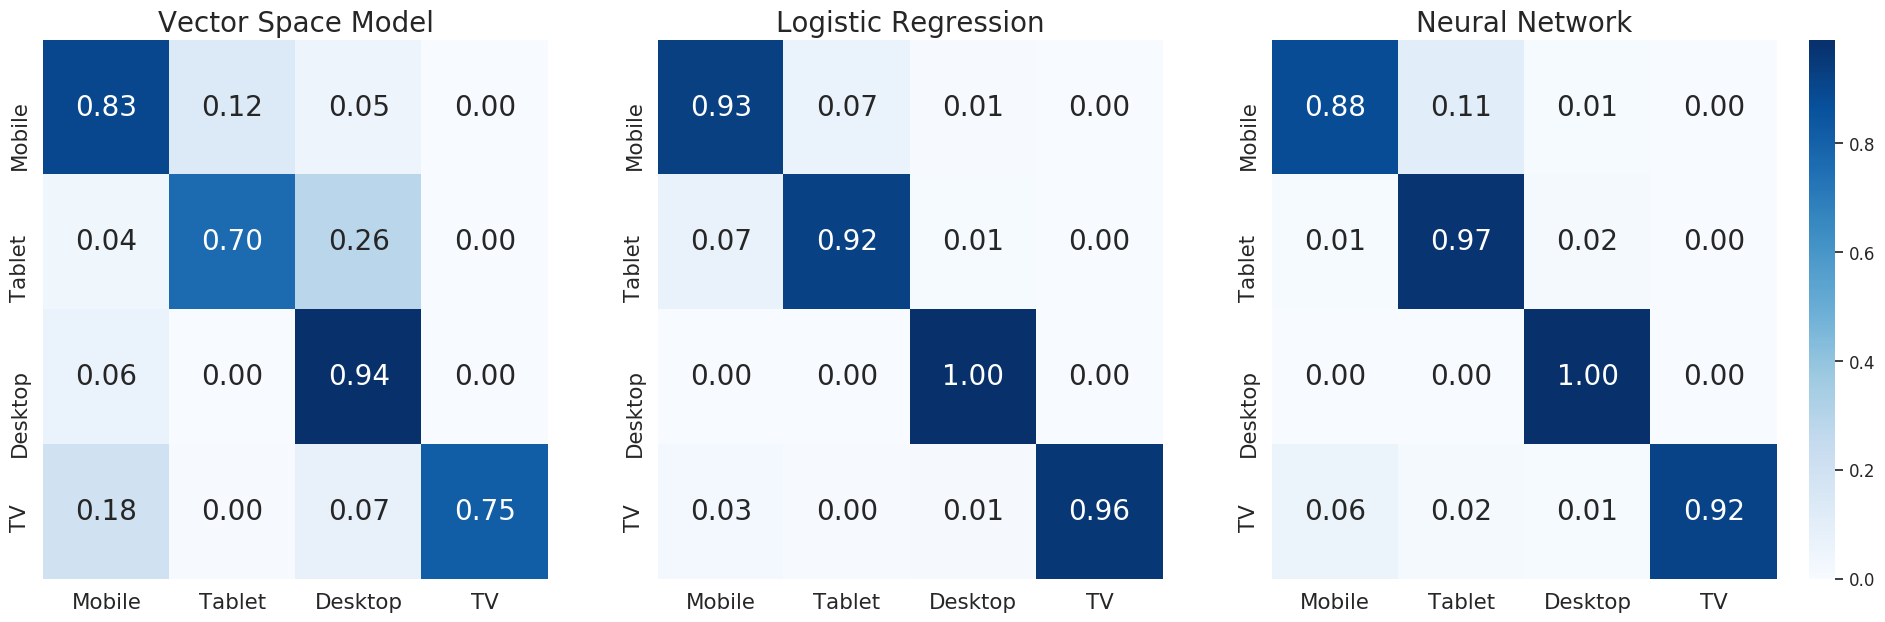

In [25]:
# define figure structure
mpl.style.use('default')
fig = plt.figure(figsize=(24, 7))
plt.tick_params(axis='both', which='both', bottom=False, top=False,
                labelbottom=False, right=False, left=False, labelleft=False)
plt.rcParams['figure.facecolor'] = 'white'

sn.set(font_scale=1.4)

ax = plt.axes()
ax.axis('off')
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 1.25]) 
ax1 = plt.subplot(gs[0]) # ax1 = fig.add_subplot(1, 3, 1) # row, column, position
ax2 = plt.subplot(gs[1]) # ax2 = fig.add_subplot(1, 3, 2)
ax3 = plt.subplot(gs[2]) # ax3 = fig.add_subplot(1, 3, 3)
ax1.set_title('Vector Space Model', fontsize=20)
#ax1.xaxis.set_ticks_position('top')
ax2.set_title('Logistic Regression', fontsize=20)
#ax2.xaxis.set_ticks_position('top')
ax3.set_title('Neural Network', fontsize=20)
#ax3.xaxis.set_ticks_position('top')

# create confusion matrices
df_cm_vsm = pd.DataFrame(vsm_results, index = [i for i in devices],
                  columns = [i for i in devices])

hm_vsm = sn.heatmap(df_cm_vsm, ax=ax1, annot=True, annot_kws={"size": 20}, robust=True,
                    cmap='Blues', cbar=False, fmt=".2f")

sn.set(font_scale=1.1)#for label size
df_cm_logreg = pd.DataFrame(logreg_results, index = [i for i in devices],
                  columns = [i for i in devices])

sn.heatmap(df_cm_logreg, ax=ax2, annot=True, annot_kws={"size": 20}, robust=True,
           cmap='Blues',  cbar=False, fmt=".2f")

df_cm_neur = pd.DataFrame(neur_results, index = [i for i in devices],
                  columns = [i for i in devices])

sn.heatmap(df_cm_neur, ax=ax3, annot=True, annot_kws={"size": 20}, robust=True,
           cmap='Blues', fmt=".2f")

#create figure
plt.savefig('confusion.png', transparent = True)
fig.savefig('confusion.eps', format='eps')